## HVI Tutorial (Part 4: Multiple Runs)

Elchin Jafarov 
8/2018

## 4. Multiple Runs
Here we show how we calculate scores for each specie in the framework

In [1]:
import numpy as np
import LLM_model_class as llm
import hsi_plot_utils as hsi_plt
import matplotlib.pyplot as plt
import time
%matplotlib inline

First I run the model from sratch to generate distribution that will be used later. NOTE: p.instantiate(0) and p.instantiate(1). 

In [2]:
def multiple_runs(tree_mature_age):
    p = llm.LLM() 
    p.verbose=0       # 0: do not print out scores, 1: print scores on the screen
    p.dim=10

    # Maturity age of the HW tree, for high fire prob it gets killed to often so start with small age
    p.tree_mature_age=tree_mature_age

    p.fire_prob = 0.10 # yearly fire probability, Ich: 0.35, Ord: 0.25
    p.mast_prob = 0.15 # seed masting prob. for LP, based on Boyer's long-term data

    # To generate fire and mast randomly 'readfireprobfromfile' and 'readmastprobfromfile' have to be turned off 
    p.readfireprobfromfile=0
    p.readmastprobfromfile=0
    p.instantiate(0) # 1: reads input data from file, 0: generate inputs internally
    nyears=200
    p.run(nyears) # runs only 2 year
    p.save_pickle()
    
    sc_rcw=[]
    sc_gt=[]
    sc_sq=[]
    n=4
    nyears=200
    for i in range(n):
        p.instantiate(1) # 1: reads input data from file, 0: generate inputs internally
        p.run(nyears) # runs only 2 year
        sc_rcw.append((np.asarray(p.age_sc)+np.asarray(p.hw_sc)+
                       np.asarray(p.ageHW_sc)+np.asarray(p.hwHW_sc))*0.25)
        sc_gt.append(p.gt_sc)
        sc_sq.append(p.sq_sc)
        
    sc_gt=np.reshape(sc_gt, (nyears, n))
    sc_sq=np.reshape(sc_sq, (nyears, n))
    sc_rcw=np.reshape(sc_rcw, (nyears, n))
    plt.subplot(211)
    hsi_plt.plot_tree_count(p)
    plt.subplot(212)
    hsi_plt.plot_llp2hw_ratio(p)
    plt.tight_layout()
    
    del p
    return sc_rcw,sc_gt,sc_sq

## Test of the same runs with different 'tree_mature_age' parameter

no. of starting HW trees 8
no. of starting HW trees 9
no. of starting HW trees 10
no. of starting HW trees 11
no. of starting HW trees 17
HW trees > 10: [148.0, 146.0, 146.0, 142.0, 146.0, 148.0, 127.0, 125.0, 123.0]
HW total: 155.0
LLP trees > 10: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
LLP total: 0.0
hw/llp ratio: 0.0


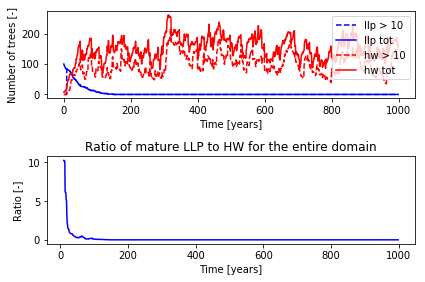

In [3]:
[sc_rcw,sc_gt,sc_sq]=multiple_runs(10)

no. of starting HW trees 8
no. of starting HW trees 9
no. of starting HW trees 7
no. of starting HW trees 9
no. of starting HW trees 20
HW trees > 20: [47.0, 50.0, 53.0, 54.0, 56.0, 49.0, 48.0, 47.0, 52.0]
HW total: 119.0
LLP trees > 20: [16.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0]
LLP total: 14.0
hw/llp ratio: 0.25


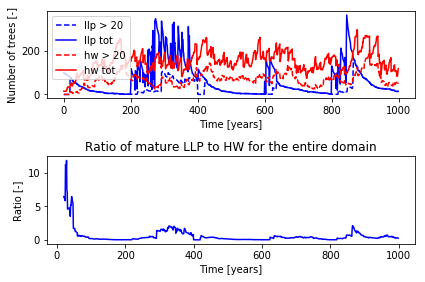

In [4]:
[sc_rcw1,sc_gt1,sc_sq1]=multiple_runs(20)

no. of starting HW trees 9
no. of starting HW trees 6
no. of starting HW trees 12
no. of starting HW trees 8
no. of starting HW trees 12
HW trees > 30: [67.0, 66.0, 64.0, 64.0, 91.0, 97.0, 99.0, 109.0, 112.0]
HW total: 275.0
LLP trees > 30: [17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0]
LLP total: 16.0
hw/llp ratio: 0.14


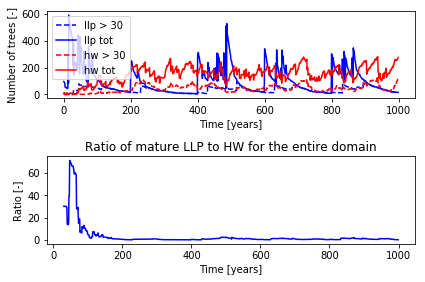

In [5]:
[sc_rcw2,sc_gt2,sc_sq2]=multiple_runs(30)

## Ploting score comparisions

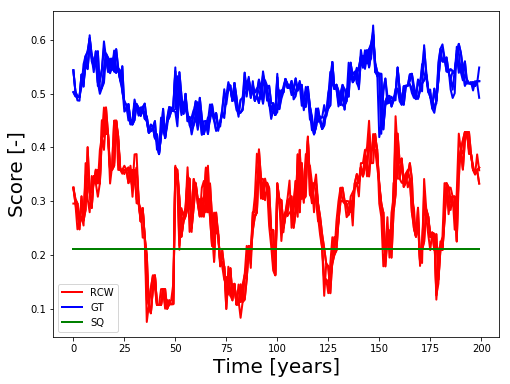

In [6]:
hsi_plt.plot_multi_output(sc_gt,sc_sq,sc_rcw)

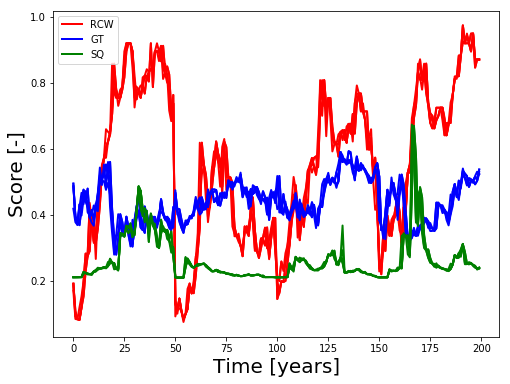

In [7]:
hsi_plt.plot_multi_output(sc_gt1,sc_sq1,sc_rcw1)

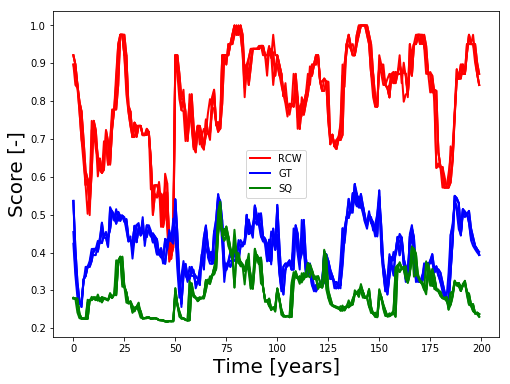

In [8]:
hsi_plt.plot_multi_output(sc_gt2,sc_sq2,sc_rcw2)